# **Exploratory Data Analysis**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


## Uploading Data and moving it to Drive

In [ ]:
# Uploading the data files to the Colab environmetn
from google.colab import files
uploaded = files.upload()

Saving product_info.csv to product_info.csv


In [ ]:
# Connecting the Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Moving the Product_info file to the Google Drive folder
import shutil

# Create the folder if it doesn't exist (optional, recommended)
import os
os.makedirs("/content/drive/MyDrive/ColabData", exist_ok=True)

# Source file (from current Colab environment)
src = "product_info.csv"

# Destination path in your Drive
dst = "/content/drive/MyDrive/ColabData/product_info.csv"

# Move the file
shutil.move(src, dst)


'/content/drive/MyDrive/ColabData/product_info.csv'

In [ ]:
# Moving the Reviews files to the Google Drive folder
drive_path = "/content/drive/MyDrive/ColabData/"

files = [

    "reviews_0-250.csv",
    "reviews_250-500.csv",
    "reviews_500-750.csv",
    "reviews_750-1250.csv",
    "reviews_1250-end.csv"
]

for f in files:
    shutil.move(f, drive_path + f)
    print(f"✅ Moved: {f}")

## Products Data

In [ ]:
# Reading the Products data
from google.colab import drive
drive.mount('/content/drive')
products_df = pd.read_csv("/content/drive/MyDrive/ColabData/product_info.csv")

Mounted at /content/drive


In [ ]:
#products_df = pd.read_csv("/content/drive/MyDrive/ColabData/product_info.csv")

In [ ]:
# Dataset Size
products_df.shape

(8494, 27)

In [ ]:
# First 5 rows
products_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
# Data types
products_df.dtypes

,0
product_id,object
product_name,object
brand_id,int64
brand_name,object
loves_count,int64
rating,float64
reviews,float64
size,object
variation_type,object
variation_value,object


#### Data Cleaning

In [ ]:
# Checking for missing values
products_df.isnull().sum()

,0
product_id,0
product_name,0
brand_id,0
brand_name,0
loves_count,0
rating,278
reviews,278
size,1631
variation_type,1444
variation_value,1598


In [ ]:
# Checking for duplicates
duplicate_count = products_df.duplicated(subset=['product_id', 'brand_id', 'variation_type']).sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Standardize column names
# The strip() function removes leading and trailing whitespace from a string.
products_df.columns = products_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Strip whitespace from all string (object) fields
str_cols = products_df.select_dtypes(include='object').columns
products_df[str_cols] = products_df[str_cols].apply(lambda x: x.str.strip().str.lower())

In [ ]:
# fill the nan values in the reviews column with 0
products_df['reviews'] = products_df['reviews'].fillna(0)

In [ ]:
# fill the missing values in the "size" column with descriptive text
products_df['size'] = products_df['size'].fillna("Size not specified")

In [ ]:
# Convert binary columns to boolean (keeping missing values if any)
binary_cols = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']
for col in binary_cols:
    products_df[col] = products_df[col].apply(lambda x: True if x == 1 else False if x == 0 else pd.NA)

In [ ]:
# Clean empty strings in key text fields
products_df['highlights'].replace('', pd.NA, inplace=True)
products_df['ingredients'].replace('', pd.NA, inplace=True)

<ipython-input-10-aaea640fb2ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['highlights'].replace('', pd.NA, inplace=True)
<ipython-input-10-aaea640fb2ce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
products_df.shape

(8494, 27)

In [ ]:
products_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Size not specified,NaN,NaN,...,True,False,False,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:

# Save cleaned dataset
products_df.to_csv("cleaned_product_info.csv", index=False)
from google.colab import files
files.download('cleaned_product_info.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Statistics

In [ ]:
numeric_columns = ['loves_count','rating', 'reviews','price_usd', 'value_price_usd',
       'sale_price_usd', 'child_count','child_max_price', 'child_min_price']

In [ ]:
# Mean value for numeric attributes
mean_values = round(products_df[numeric_columns].mean(), 1)
mean_df = mean_values.to_frame(name='mean_value')
print(mean_df)


                 mean_value
loves_count         29179.6
rating                  4.2
reviews               433.9
price_usd              51.7
value_price_usd        91.2
sale_price_usd         20.2
child_count             1.6
child_max_price        53.8
child_min_price        39.7


In [ ]:
# Median value for numeric attributes
median_values = round(products_df[numeric_columns].median(), 1)
median_df = median_values.to_frame(name='median_value')
print(median_df)


                 median_value
loves_count            9880.0
rating                    4.3
reviews                 112.0
price_usd                35.0
value_price_usd          67.0
sale_price_usd           14.0
child_count               0.0
child_max_price          32.0
child_min_price          28.0


In [ ]:
# Std value for numeric attributes
std_values = round(products_df[numeric_columns].std(), 1)
std_df = std_values.to_frame(name='std_value')
print(std_df)

                 std_value
loves_count        66092.1
rating                 0.5
reviews             1086.7
price_usd             53.7
value_price_usd       79.2
sale_price_usd        24.3
child_count            5.4
child_max_price       58.8
child_min_price       38.7


In [ ]:
boolean_columns=['limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive',]

In [ ]:
# Value Counts for boolean attributes
for col in boolean_columns:
    print(f"\n--- {col} ---")
    percents = products_df[col].value_counts(dropna=False, normalize=True) * 100
    for value in percents.index:
        print(f"{value}: {round(percents[value], 1)}%")




--- limited_edition ---
False: 93.0%
True: 7.0%

--- new ---
False: 92.8%
True: 7.2%

--- online_only ---
False: 78.1%
True: 21.9%

--- out_of_stock ---
False: 92.6%
True: 7.4%

--- sephora_exclusive ---
False: 72.1%
True: 27.9%


In [ ]:
# Value counts for brand_name
brand_proportion = round(products_df['brand_name'].value_counts(normalize=True) * 100, 2)
brand_proportion = brand_proportion.astype(str) + '%'
brand_proportion


,proportion
brand_name,
sephora collection,4.14%
clinique,2.11%
dior,1.6%
tarte,1.54%
nest new york,1.35%
...,...
christian louboutin,0.01%
proven skincare,0.01%
philosophy,0.01%


In [ ]:
# Value counts for primary_category
products_df['primary_category'].value_counts()

,count
primary_category,
skincare,2420
makeup,2369
hair,1464
fragrance,1432
bath & body,405
mini size,288
men,60
tools & brushes,52
gifts,4


In [ ]:
# Value counts for variation_type
products_df['variation_type'].value_counts()

,count
variation_type,
size,4043
color,1700
size + concentration + formulation,1173
type,88
scent,30
size + concentration,11
formulation,5


#### Visualization

In [ ]:
products_df[products_df['price_usd']==1900]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
6802,p502216,shani darden by déesse pro led light mask,6314,shani darden skin care,4154,3.8,4.0,Size not specified,NaN,NaN,...,True,False,True,"['good for: loss of firmness', 'good for: anti...",skincare,high tech tools,anti-aging,0,NaN,NaN


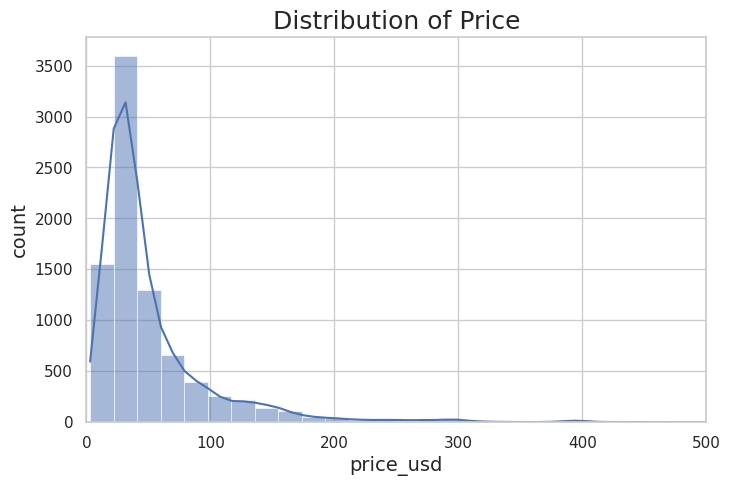

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(products_df['price_usd'],kde=True,bins=100,color='b')
plt.title('Distribution of Price',size=18)
plt.xlabel('price_usd',size=14)
plt.ylabel('count',size=14)
plt.xlim(0,500)
plt.show()

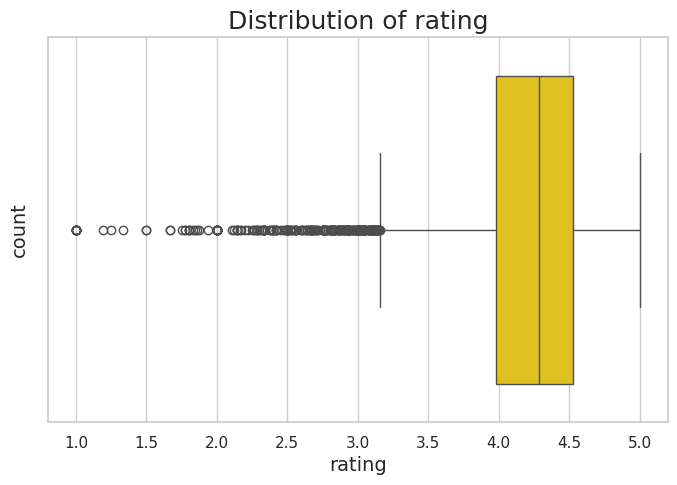

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=products_df['rating'].dropna(), color="gold")
plt.title('Distribution of rating',size=18)
plt.xlabel('rating',size=14)
plt.ylabel('count',size=14)
plt.show()

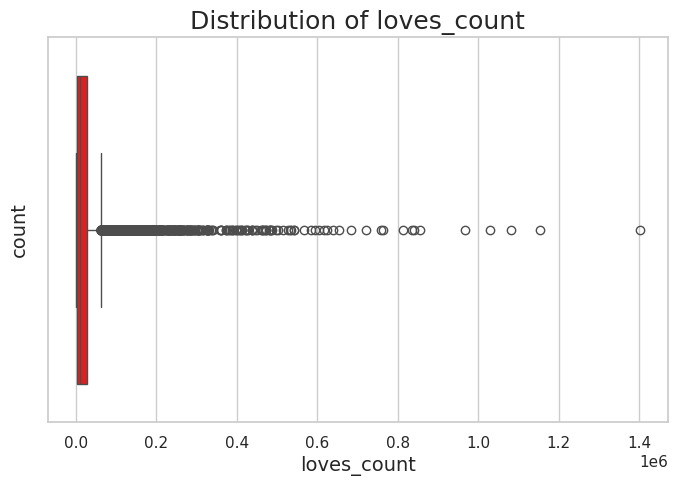

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=products_df['loves_count'].dropna(), color="red")
plt.title('Distribution of loves_count',size=18)
plt.xlabel('loves_count',size=14)
plt.ylabel('count',size=14)
plt.show()

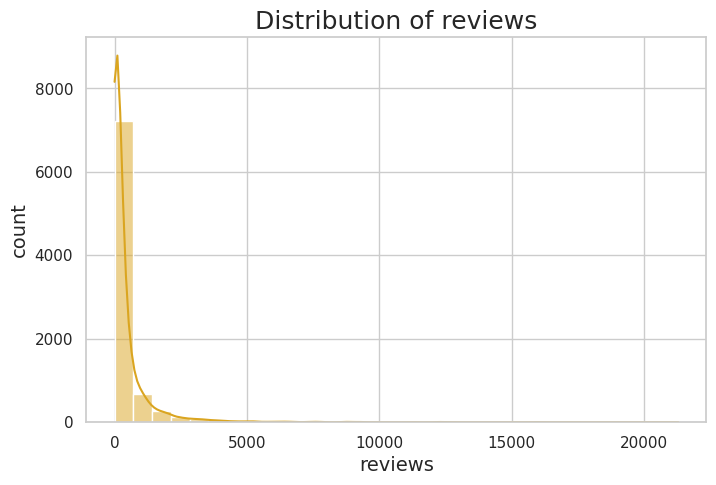

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(products_df['reviews'],kde=True,bins=30,color='goldenrod')
plt.title('Distribution of reviews',size=18)
plt.xlabel('reviews',size=14)
plt.ylabel('count',size=14)
plt.show()

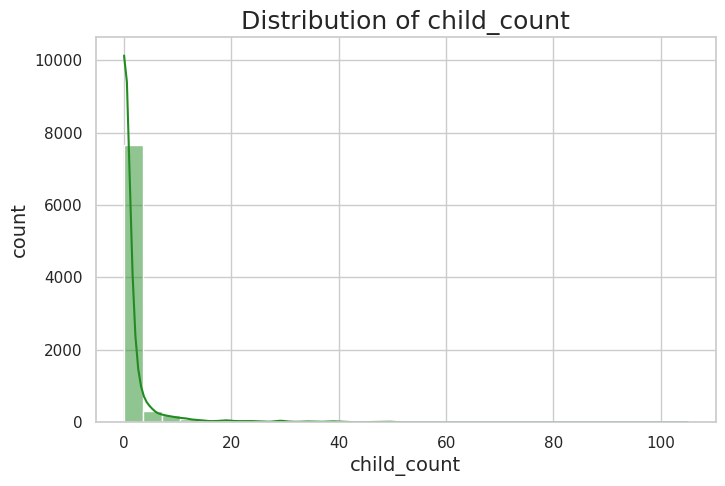

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(products_df['child_count'],kde=True,bins=30,color='forestgreen')
plt.title('Distribution of child_count',size=18)
plt.xlabel('child_count',size=14)
plt.ylabel('count',size=14)
plt.show()

In [ ]:
# Select relevant numeric columns for relationships
relationship_cols = ['price_usd', 'rating', 'loves_count', 'reviews', 'child_count']

# Drop rows with missing values in selected columns
pairplot_data = products_df[relationship_cols].dropna()

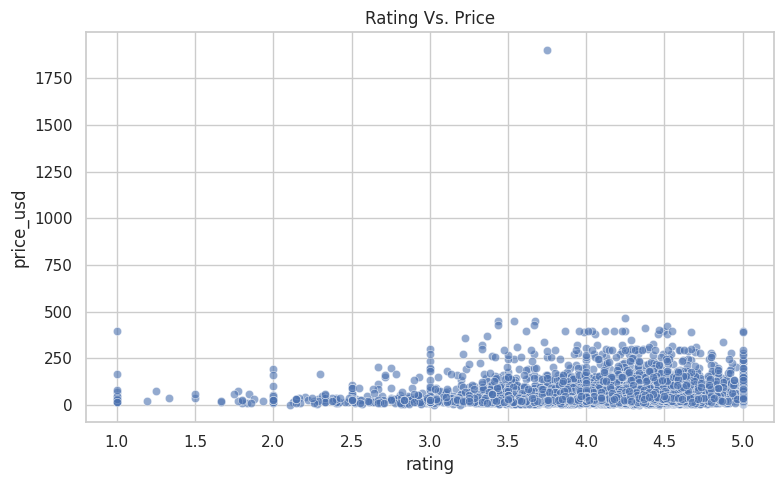

In [ ]:
# Generate a scatter plot - Rating Vs. Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=pairplot_data, x='rating', y='price_usd', alpha=0.6)
plt.title("Rating Vs. Price")
plt.tight_layout()
plt.show()

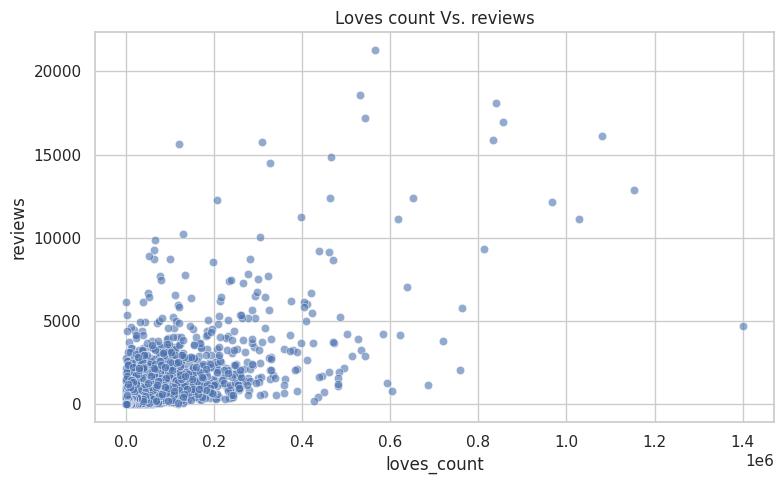

In [ ]:
# Generate a scatter plot - Loves count Vs. reviews
plt.figure(figsize=(8,5))
sns.scatterplot(data=pairplot_data, x='loves_count', y='reviews', alpha=0.6)
plt.title("Loves count Vs. reviews")
plt.tight_layout()
plt.show()

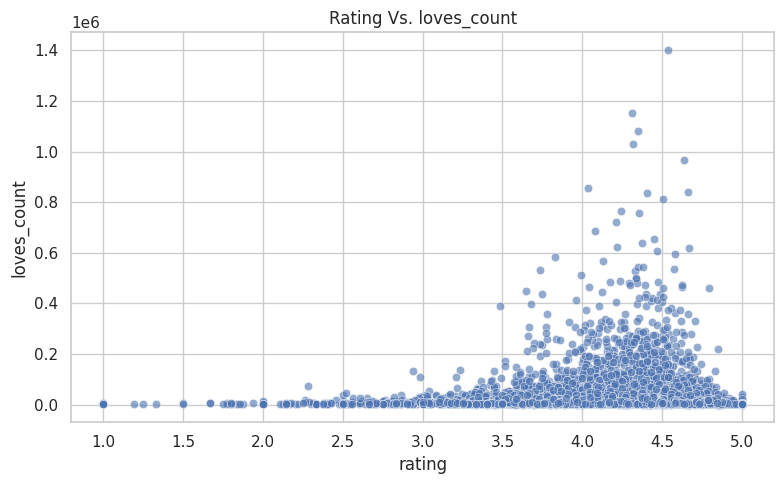

In [ ]:
# Generate a scatter plot - Rating Vs.loves_count
plt.figure(figsize=(8,5))
sns.scatterplot(data=pairplot_data, x='rating', y='loves_count', alpha=0.6)
plt.title("Rating Vs. loves_count")
plt.tight_layout()
plt.show()

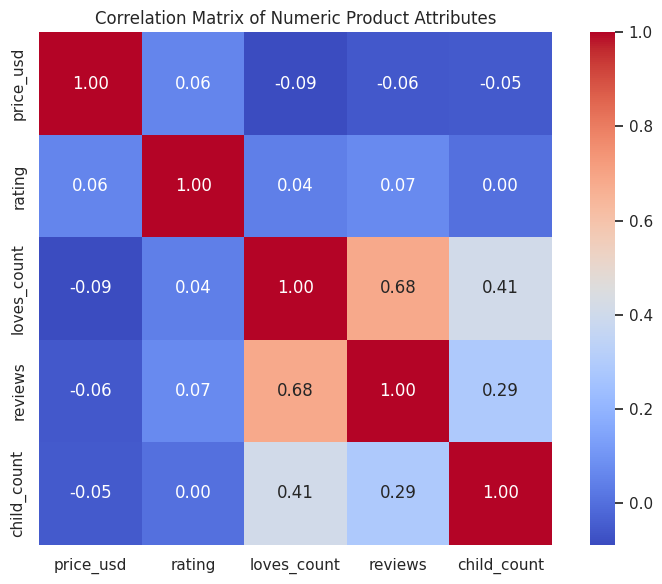

In [ ]:
# create correlation matrix of numeric product attributes
plt.figure(figsize=(8, 6))

corr = pairplot_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Product Attributes")
plt.tight_layout()
plt.show()

## Reviews Data

In [ ]:
# Reading and concatenating the Reviews
from google.colab import drive
drive.mount('/content/drive')

folder = "/content/drive/MyDrive/ColabData/"

files = [
    "reviews_0-250.csv",
    "reviews_250-500.csv",
    "reviews_500-750.csv",
    "reviews_750-1250.csv",
    "reviews_1250-end.csv"
]

# Read and combine all CSVs
df_list = [pd.read_csv(folder + f) for f in files]
df_reviews = pd.concat(df_list, ignore_index=True)

# Preview
df_reviews.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-17-a4ff5a6951fb>:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(folder + f) for f in files]
<ipython-input-17-a4ff5a6951fb>:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(folder + f) for f in files]
<ipython-input-17-a4ff5a6951fb>:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(folder + f) for f in files]


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# Dataset Size
df_reviews.shape

(1094411, 19)

In [ ]:
# Data types
df_reviews.dtypes

,0
author_id,object
rating,int64
is_recommended,float64
helpfulness,float64
total_feedback_count,int64
total_neg_feedback_count,int64
total_pos_feedback_count,int64
submission_time,object
review_text,object
review_title,object


#### Data Cleaning

In [ ]:
# Removing an Unnamed column (not needed, it was created because of the concatenating)
df_reviews = df_reviews.drop(columns=["Unnamed: 0"])
df_reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# Convert the submission_time column to a proper datetime format
df_reviews['submission_time'] = pd.to_datetime(df_reviews['submission_time'])

In [ ]:
# Filter for reviews from 2020 onwards
df_reviews_filtered = df_reviews[df_reviews['submission_time'].dt.year >= 2020]

# Optional: check the result
df_reviews_filtered.head(100)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44472131871,5,1.0,0.0,1,1,0,2023-03-02,I love everything laneige and this is no excep...,Laneige lover,fairLight,gray,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
96,6036085339,5,1.0,NaN,0,0,0,2023-03-02,It’s the holy grail of lip hydration. I don’t ...,NaN,fairLight,blue,dry,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
97,12119150865,5,1.0,NaN,0,0,0,2023-03-02,it’s nice but buy the amazon dupe. Also the ap...,it’s nice but there are dupes,lightMedium,brown,normal,auburn,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
98,43606919347,2,0.0,NaN,0,0,0,2023-03-02,"I don’t understand the hype, it’s definitely n...",It’s okay,light,blue,oily,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
# Size of filtered Data
df_reviews_filtered.shape

(659219, 18)

In [ ]:
# Checking for missing values
df_reviews_filtered.isnull().sum()

,0
author_id,0
rating,0
is_recommended,42
helpfulness,291676
total_feedback_count,0
total_neg_feedback_count,0
total_pos_feedback_count,0
submission_time,0
review_text,24
review_title,204457


In [ ]:
# Checking for duplicates
duplicate_count_reviews = df_reviews_filtered.duplicated(subset=['author_id', 'product_id', 'review_text']).sum()
print(f"Number of duplicate rows: {duplicate_count_reviews}")

Number of duplicate rows: 299


In [ ]:
# Remove duplicate rows
df_reviews_filtered.drop_duplicates(subset=['author_id', 'product_id', 'review_text'],inplace=True)

<ipython-input-22-418375845da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filtered.drop_duplicates(subset=['author_id', 'product_id', 'review_text'],inplace=True)


In [ ]:
df_reviews_filtered.shape

(658920, 18)

In [ ]:
# Standardize column names
df_reviews_filtered.columns = df_reviews_filtered.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Convert binary column 'is_recommended' to boolean
df_reviews_filtered['is_recommended'] = df_reviews_filtered['is_recommended'].apply(
    lambda x: True if x == 1 else False if x == 0 else pd.NA
)

<ipython-input-26-6f57fb47f480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filtered['is_recommended'] = df_reviews_filtered['is_recommended'].apply(


In [ ]:
# Replace empty strings in key text fields with NaN
text_cols = ['review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color']
df_reviews_filtered[text_cols] = df_reviews_filtered[text_cols].replace('', pd.NA)

<ipython-input-27-f1e2d2f3dff0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filtered[text_cols] = df_reviews_filtered[text_cols].replace('', pd.NA)


In [ ]:
df_reviews_filtered['helpfulness'] = df_reviews_filtered.apply(
    lambda row: row['total_pos_feedback_count'] / row['total_feedback_count']
    if row['total_feedback_count'] > 0 else pd.NA,
    axis=1
)


<ipython-input-28-a221dd7b1928>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filtered['helpfulness'] = df_reviews_filtered.apply(


In [ ]:
# Save cleaned file
df_reviews_filtered.to_csv("cleaned_reviews.csv", index=False)
from google.colab import files
files.download('cleaned_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_reviews_filtered.shape

(658920, 18)

#### Statistics

In [ ]:
df_reviews_filtered.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
numeric_columns_reviews = ['rating','price_usd','helpfulness']

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
# Mean value for numeric attributes
mean_values_rev = df_reviews_filtered[numeric_columns_reviews].mean()
mean_df_rev = mean_values_rev.to_frame(name='mean_value')
print(mean_df_rev)


            mean_value
rating             4.3
price_usd         51.3
helpfulness        0.8


In [ ]:
# Median value for numeric attributes
median_values_rev = df_reviews_filtered[numeric_columns_reviews].median()
median_df_rev = median_values_rev.to_frame(name='median_value')
print(median_df_rev)


            median_value
rating               5.0
price_usd           42.0
helpfulness          1.0


In [ ]:
# std value for numeric attributes
std_values_rev = df_reviews_filtered[numeric_columns_reviews].std()
std_df_rev = std_values_rev.to_frame(name='std_value')
print(std_df_rev)



            std_value
rating            1.1
price_usd        43.6
helpfulness       0.3


In [ ]:
# Value counts for brand_name
brand_prop = round(df_reviews_filtered['brand_name'].value_counts(normalize=True) * 100, 2)
brand_prop = brand_prop.astype(str) + '%'
brand_prop

,proportion
brand_name,
glow recipe,4.31%
tatcha,4.12%
the ordinary,3.82%
the inkey list,3.65%
dermalogica,3.27%
...,...
anastasia beverly hills,0.0%
koh gen do,0.0%
erno laszlo,0.0%


In [ ]:
# Value counts for skin_type
skin_prop = round(df_reviews_filtered['skin_type'].value_counts(normalize=True) * 100, 1)
skin_prop = skin_prop.astype(str) + '%'
skin_prop

,proportion
skin_type,
combination,55.4%
dry,19.3%
normal,13.8%
oily,11.6%


In [ ]:
# Value counts for hair_color
hair_prop = round(df_reviews_filtered['hair_color'].value_counts(normalize=True) * 100, 1)
hair_prop = hair_prop.astype(str) + '%'
hair_prop

,proportion
hair_color,
brown,46.2%
blonde,23.5%
black,22.6%
auburn,3.5%
red,2.9%
brunette,0.7%
gray,0.6%


In [ ]:
# Average number of reviews per user
Average_number_of_reviews = round(len(df_reviews_filtered)/df_reviews_filtered['author_id'].nunique(),2)
print(f"Average number of reviews per user: {Average_number_of_reviews}")

Average number of reviews per user: 2.72


In [ ]:
# values counts for recommended attribute
print("--- Is_recommended ---")
percents = df_reviews_filtered['is_recommended'].value_counts(dropna=False, normalize=True) * 100
for value in percents.index:
  print(f"{value}: {round(percents[value])}%")

--- Is_recommended ---
True: 84%
False: 16%
<NA>: 0%


#### Visualization

In [ ]:
df_reviews_filtered.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
df_reviews_filtered['price_usd'].max()

1900.0

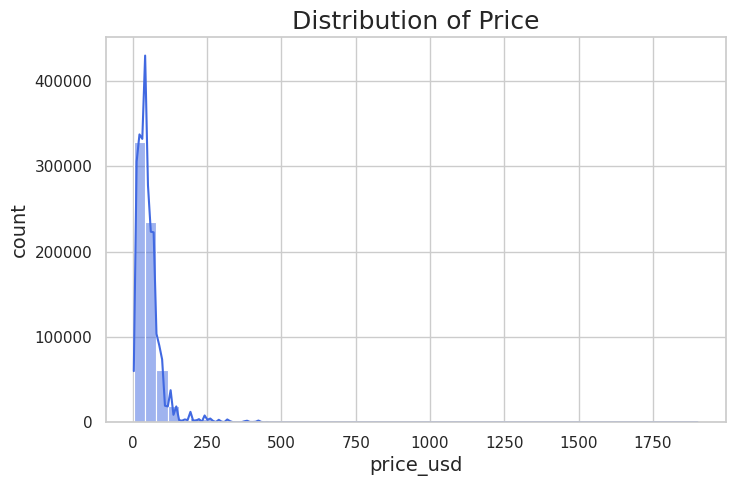

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.histplot(df_reviews_filtered['price_usd'].dropna(),kde=True,bins=50,color='royalblue')
plt.title('Distribution of Price',size=18)
plt.xlabel('price_usd',size=14)
plt.ylabel('count',size=14)
#plt.xlim(0,500)
plt.show()

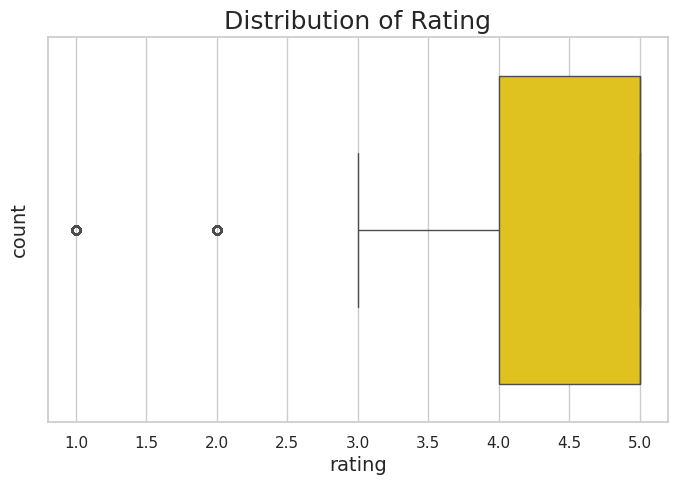

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.boxplot(x=df_reviews_filtered['rating'].dropna(), color="gold")
plt.title('Distribution of Rating',size=18)
plt.xlabel('rating',size=14)
plt.ylabel('count',size=14)
plt.show()

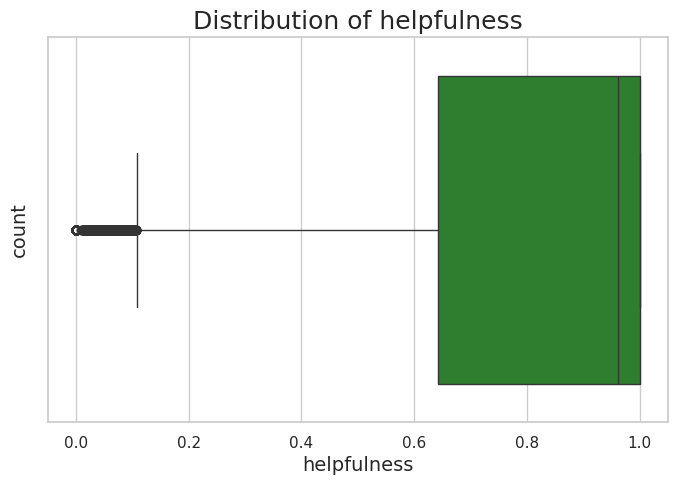

In [ ]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.boxplot(x=df_reviews_filtered['helpfulness'].dropna(), color="forestgreen")
plt.title('Distribution of helpfulness',size=18)
plt.xlabel('helpfulness',size=14)
plt.ylabel('count',size=14)
plt.show()

In [ ]:
# Select relevant numeric columns for relationships
relationship_cols_rev = ['price_usd', 'rating', 'helpfulness', 'is_recommended', 'total_feedback_count']

# Drop rows with missing values in selected columns
plot_data = df_reviews_filtered[relationship_cols_rev].dropna()

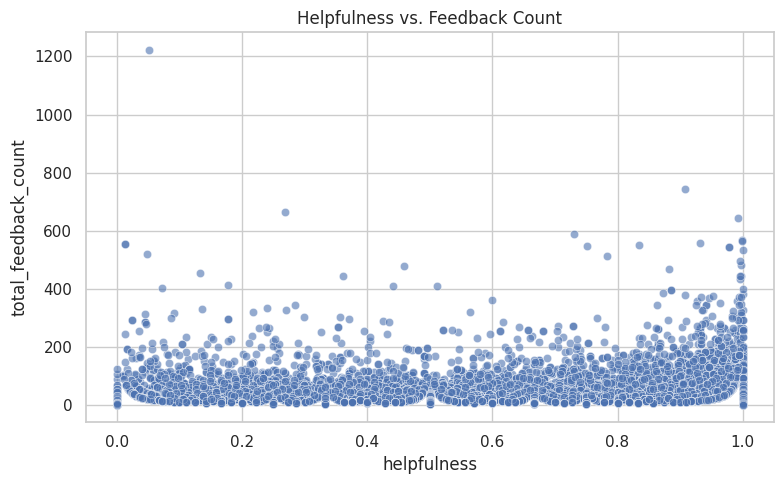

In [ ]:
# Generate a scatter plot - Helpfulness vs. Feedback Count
plt.figure(figsize=(8,5))
sns.scatterplot(data=plot_data, x='helpfulness', y='total_feedback_count', alpha=0.6)
plt.title("Helpfulness vs. Feedback Count")
plt.tight_layout()
plt.show()

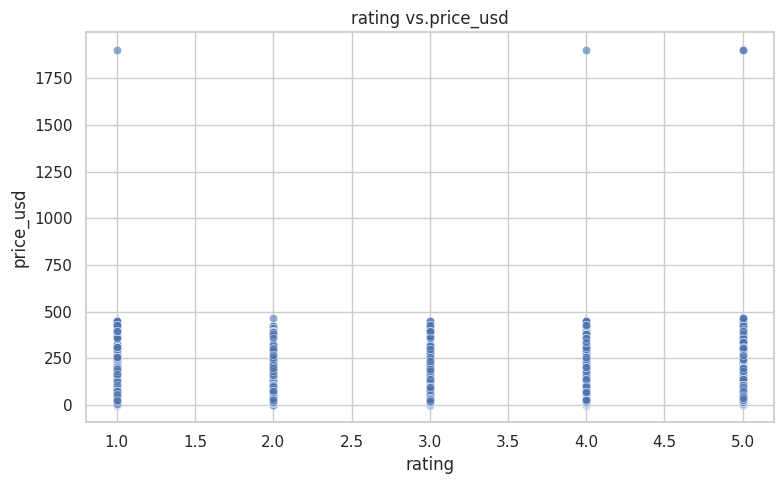

In [ ]:
# Generate a scatter plot - rating vs. price_usd
plt.figure(figsize=(8,5))
sns.scatterplot(data=plot_data, x='rating', y='price_usd', alpha=0.6)
plt.title("rating vs.price_usd")
plt.tight_layout()
plt.show()

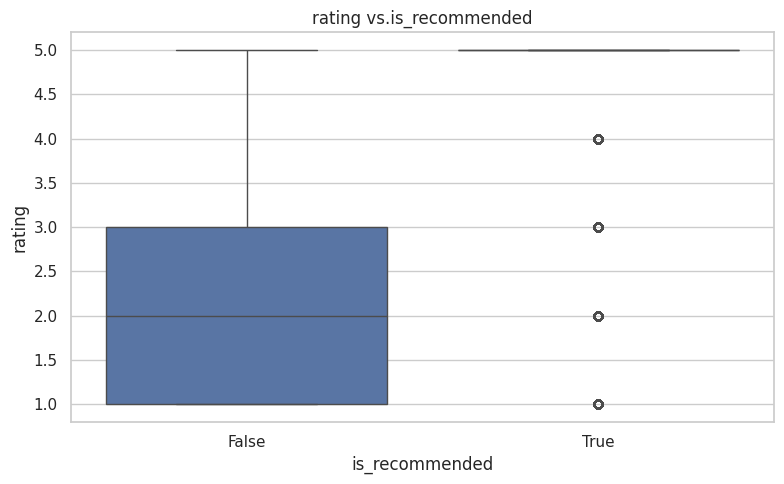

In [ ]:
# Generate a scatter plot - rating vs. is_recommended
plt.figure(figsize=(8,5))
sns.boxplot(x='is_recommended', y='rating', data=plot_data)
plt.title("rating vs.is_recommended")
plt.tight_layout()
plt.show()

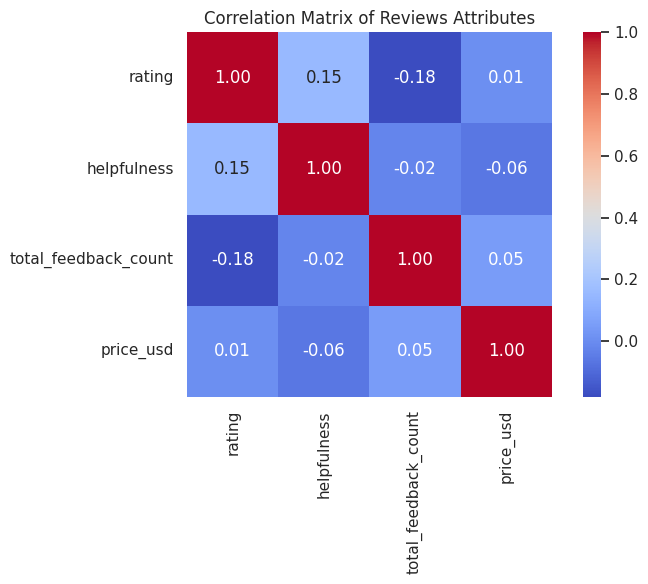

In [ ]:
# create correlation matrix of numeric product attributes
plt.figure(figsize=(8, 6))
numeric_cols = ['rating', 'helpfulness', 'total_feedback_count', 'price_usd']

# Create correlation matrix
clean_data = df_reviews_filtered[numeric_cols].dropna()

# Create and plot the correlation matrix
corr_matrix = clean_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Reviews Attributes")
plt.tight_layout()
plt.show()